In [1]:
import pandas as pd
import numpy as np
import os
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud,ImageColorGenerator
import matplotlib.pyplot as plt

In [2]:
os.chdir('/home/zyf0717/git/STB_social_media_analytics')

In [3]:
tripa_aspects_path = './tripadvisor/aspects_output/aspects_200221_202525.csv'
tripa_aspects_df = pd.read_csv(tripa_aspects_path)
tripa_aspects_df = tripa_aspects_df.dropna(axis=0).reset_index(drop=True) 
tripa_aspects_df.head()

,POI_INDEX,ASPECTS,ATTRACTION_TYPES,ASPECTS_CRAWLED_TIME
0,1,flower dome,"Nature & Parks, Sights & Landmarks, Points of ...",2020-02-21 20:25:41.162380
1,1,light show,"Nature & Parks, Sights & Landmarks, Points of ...",2020-02-21 20:25:41.178771
2,1,cloud forest,"Nature & Parks, Sights & Landmarks, Points of ...",2020-02-21 20:25:41.195397
3,1,super trees,"Nature & Parks, Sights & Landmarks, Points of ...",2020-02-21 20:25:41.211427
4,1,sky walk,"Nature & Parks, Sights & Landmarks, Points of ...",2020-02-21 20:25:41.228103


In [4]:
valid_pois = set(tripa_aspects_df.POI_INDEX)
valid_pois_idx = [tripa_aspects_df.POI_INDEX.eq(i).idxmax() for i in valid_pois]
valid_pois_idx[:5]

[0, 22, 44, 65, 87]

In [5]:
tripa_poi_attraction_types = pd.DataFrame(columns=['POI_INDEX', 'ATTRACTION_TYPE'])

for idx in valid_pois_idx:
    for attraction_type in tripa_aspects_df.loc[idx][2].split(", "):
        tripa_poi_attraction_types= tripa_poi_attraction_types.append(
            {'POI_INDEX': tripa_aspects_df.loc[idx][0], 
             'ATTRACTION_TYPE': attraction_type},
            ignore_index=True)

tripa_poi_attraction_types

,POI_INDEX,ATTRACTION_TYPE
0,1,Nature & Parks
1,1,Sights & Landmarks
2,1,Points of Interest & Landmarks
3,1,Gardens
4,2,Nature & Parks
...,...,...
1098,715,Sights & Landmarks
1099,715,Historic Sites
1100,715,Points of Interest & Landmarks
1101,758,Concerts & Shows


In [6]:
tripa_aspects_df.shape[0]

4435

In [7]:
stop_words = set(stopwords.words('english'))

def get_ngram_frequency(df, col_name, stop_words, n):
    text_list = list(df[col_name])
    stop_words = stop_words
    lemmatizer = WordNetLemmatizer()
    frequency = {}
    for text in text_list:
        temp = []
        text = text.lower()
        text = re.sub('[^a-z ]+', '', text)
        text = text.split(' ')
        for word in text:
            if word not in stop_words:
                temp.append(word)
        for i in range(len(temp)):
            if i + n - 1 < len(temp):
                word = temp[i]
                word = lemmatizer.lemmatize(word)
                for j in range(n - 1):
                    word = word + ' ' + temp[i+j+1]
                if word in frequency:
                    frequency[word] += 1
                else:
                    frequency[word] = 1
    return frequency

def merge_ngram_frequencies(df, col_name, stop_words, n):
    merged_dicts = {}
    for i in list(range(1, n+1)):
        temp_dict = get_ngram_frequency(df, col_name, stop_words, i)
        merged_dicts.update(temp_dict)
    return merged_dicts

In [8]:
tripa_aspect_frequency = merge_ngram_frequencies(
    tripa_aspects_df, 
    'ASPECTS', 
    stop_words, 
    n=3)

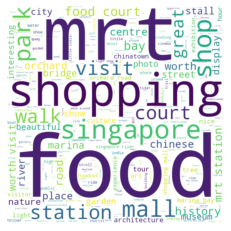

In [15]:
tripa_aspects_wordcloud = WordCloud(
    background_color="white",
    width=1000,
    height=1000, 
    max_words=1000,
    relative_scaling=1,
    random_state=42
).generate_from_frequencies(tripa_aspect_frequency)

plt.imshow(tripa_aspects_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

tripa_aspects_wordcloud.to_file('./categories/tripa_aspects_wordcloud.png')

In [16]:
tripa_ibm_keywords_path = './tripadvisor/finalised_output/'
tripa_ibm_keywords_folders = os.listdir(tripa_ibm_keywords_path)
tripa_ibm_keywords_folders

['200130_091345',
 '200129_172433',
 '200126_094431',
 '200131_090828',
 '200129_102527',
 '200130_135426',
 '200128_111646',
 '200125_142611',
 '200130_102635',
 '200131_102045',
 '200130_113340',
 '200131_161919']

In [ ]:
keywords_col_names = [
  "WEBSITE_ID", 
  "REVIEW_ID", 
  "TEXT", 
  "RELEVANCE", 
  "COUNT", 
  "SENTIMENT_SCORE", 
  "SENTIMENT_LABEL", 
  "SADNESS", 
  "JOY", 
  "FEAR", 
  "DISGUST", 
  "ANGER", 
  "MIXED_SENTIMENT"
]

tripa_ibm_keywords_df = pd.DataFrame(columns = keywords_col_names)

for folder in tripa_ibm_keywords_folders:
    sub_folders = os.listdir(tripa_ibm_keywords_path + folder)
    folder_2 = [f for f in sub_folders if f.find('sentiments') != -1][0]
    path = tripa_ibm_keywords_path + folder + "/" + folder_2 + "/"
    keywords_csv = [x for x in os.listdir(path) if x.find('keywords') != -1]
    for csv in keywords_csv:
        tripa_ibm_keywords_df = tripa_ibm_keywords_df.append(
            pd.read_csv(path + csv), 
            ignore_index=True
        )

tripa_ibm_keywords_df.head()

In [ ]:
tripa_ibm_keywords_df.shape

In [ ]:
tripa_ibm_keywords_frequency = merge_ngram_frequencies(
    tripa_ibm_keywords_df, 
    'TEXT', 
    stop_words, 
    n=3)

In [ ]:
tripa_ibm_keywords_wordcloud = WordCloud(
    background_color="white",
    width=1000,
    height=1000, 
    max_words=1000,
    relative_scaling=1,
    random_state=42
).generate_from_frequencies(tripa_ibm_keywords_frequency)

plt.imshow(tripa_ibm_keywords_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

tripa_ibm_keywords_wordcloud.to_file('./categories/tripa_ibm_keywords_wordcloud.png')